<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_7_Bonus_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [ ]:
try:
    df = pd.read_csv("heart_disease_uci.csv", names=["age", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"], na_values="?")
except FileNotFoundError:
    print("Error: heart_disease_uci.csv not found. Please provide the correct file path.")
    exit()
print(df.head())

                   age              cp  trestbps  chol    fbs         restecg  \
id age sex     dataset              cp  trestbps  chol    fbs         restecg   
1  63  Male  Cleveland  typical angina       145   233   TRUE  lv hypertrophy   
2  67  Male  Cleveland    asymptomatic       160   286  FALSE  lv hypertrophy   
3  67  Male  Cleveland    asymptomatic       120   229  FALSE  lv hypertrophy   
4  37  Male  Cleveland     non-anginal       130   250  FALSE          normal   

            thalach  exang  oldpeak        slope  ca               thal target  
id age sex   thalch  exang  oldpeak        slope  ca               thal    num  
1  63  Male     150  FALSE      2.3  downsloping   0       fixed defect      0  
2  67  Male     108   TRUE      1.5         flat   3             normal      2  
3  67  Male     129   TRUE      2.6         flat   2  reversable defect      1  
4  37  Male     187  FALSE      3.5  downsloping   0             normal      0  


In [ ]:
df = pd.get_dummies(df, columns=['cp'], drop_first=True)


In [ ]:
for col in df.columns:
    if col != 'sex_1':  # Skip 'sex_1' as it's already numeric
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            df[col] = df[col].astype(str)

In [ ]:
df = df.dropna()

In [ ]:
# Original code:
# df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Modified code:
df['target'] = pd.to_numeric(df['target'], errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN
df['target'] = df['target'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Apply the original logic

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
for col in X.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{col}': {X[col].unique()[:20]}")
    X[col] = pd.to_numeric(X[col], errors='coerce')
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78        80
           1       0.84      0.80      0.82       105

    accuracy                           0.80       185
   macro avg       0.80      0.80      0.80       185
weighted avg       0.80      0.80      0.80       185



In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[64 16]
 [21 84]]


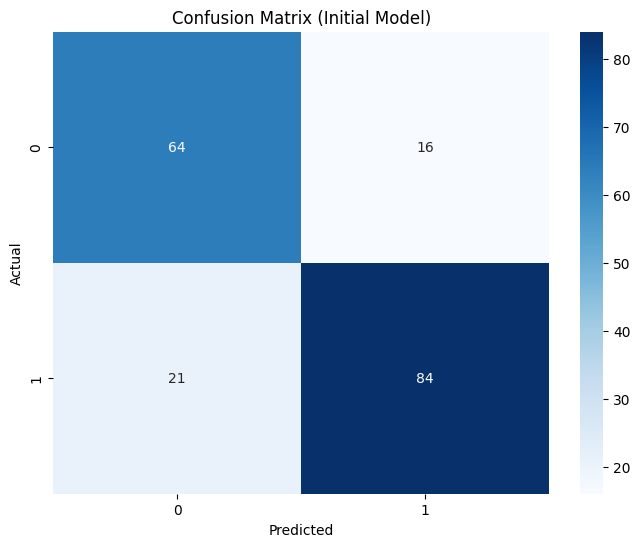

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Initial Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("\nROC AUC Score:\n", roc_auc_score(y_test, y_pred))


ROC AUC Score:
 0.8


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
y_pred_tuned = best_rf.predict(X_test)

In [ ]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", accuracy_tuned)


Tuned Model Accuracy: 0.8486486486486486


In [ ]:
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))


Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        80
           1       0.85      0.90      0.87       105

    accuracy                           0.85       185
   macro avg       0.85      0.84      0.84       185
weighted avg       0.85      0.85      0.85       185



In [ ]:
print("\nConfusion Matrix (Tuned):\n", confusion_matrix(y_test, y_pred_tuned))


Confusion Matrix (Tuned):
 [[63 17]
 [11 94]]


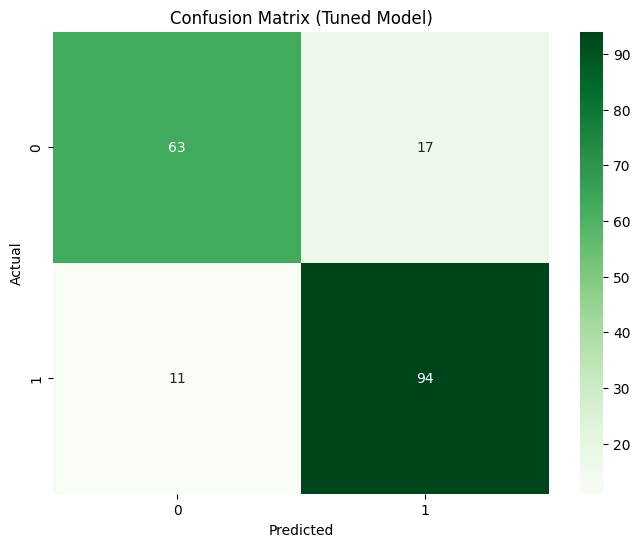

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("\nROC AUC Score (Tuned):\n", roc_auc_score(y_test, y_pred_tuned))


ROC AUC Score (Tuned):
 0.8413690476190476


In [ ]:
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance_df)


Feature Importance:
                Feature  Importance
7              oldpeak    0.211674
2                 chol    0.182164
11  cp_atypical angina    0.175803
5              thalach    0.170375
9                   ca    0.105963
1             trestbps    0.076656
13      cp_non-anginal    0.062122
14   cp_typical angina    0.015243
4              restecg    0.000000
3                  fbs    0.000000
0                  age    0.000000
6                exang    0.000000
8                slope    0.000000
10                thal    0.000000
12               cp_cp    0.000000


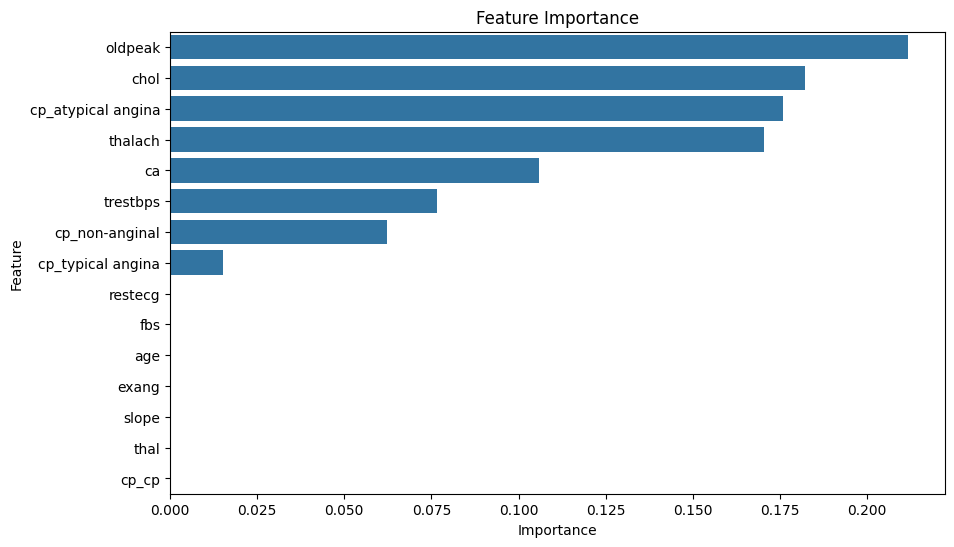

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

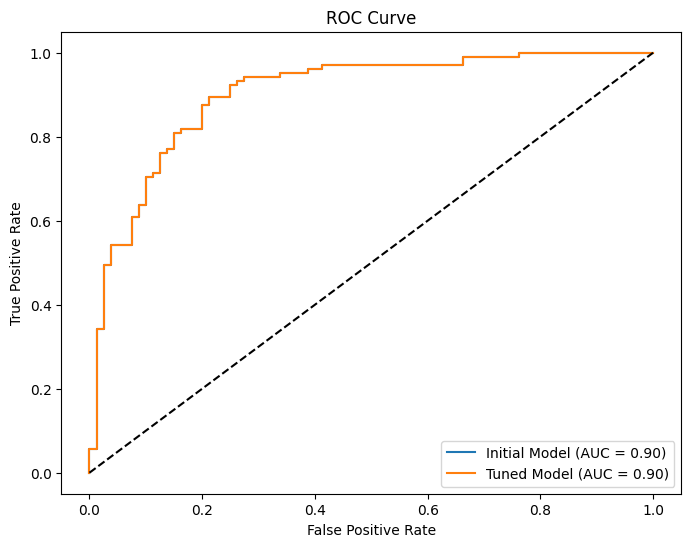

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Initial Model (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Model (AUC = {roc_auc_score(y_test, y_prob_tuned):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()